### One-Hot Encoding

**One-hot encoding** is a technique used to convert categorical data into a numerical format that can be used in machine learning algorithms. This encoding method transforms each categorical value into a new categorical column and assigns a binary value of 1 or 0 to those columns.

#### How One-Hot Encoding Works

Suppose we have a categorical feature "Color" with three possible values: "Red", "Green", and "Blue". One-hot encoding will create three new binary columns, one for each unique category in the original column. If a sample has the value "Red", the one-hot encoded columns will have values `[1, 0, 0]` for the "Red", "Green", and "Blue" columns, respectively.

Example:
| Color | Red | Green | Blue |
|-------|-----|-------|------|
| Red   | 1   | 0     | 0    |
| Green | 0   | 1     | 0    |
| Blue  | 0   | 0     | 1    |
| Red   | 1   | 0     | 0    |

#### Importance in Regression Modelling

One-hot encoding is particularly important for regression models, including linear regression and logistic regression, because these models are mathematical equation-driven. These models require numerical input to perform computations and determine relationships between variables. 

In regression models, all categorical features should be converted into numbers to ensure the model can process the data correctly. One-hot encoding ensures that categorical data is represented in a way that maintains the uniqueness of each category without implying any ordinal relationship.

#### One-Hot Encoding vs. Tree-Based Models

While one-hot encoding is essential for regression models, it is not always necessary for tree-based machine learning models, such as gradient boosting, decision trees, or random forests. These models can handle categorical variables natively or through other encoding methods like label encoding without losing information. Tree-based models split data based on feature values and can effectively manage categorical data by treating each category as a separate branch.

### Practical Example of One-Hot Encoding

Here’s how you can apply one-hot encoding in Python using the `pandas` library:

```python
import pandas as pd

# Sample data
data = {'Color': ['Red', 'Green', 'Blue', 'Red']}
df = pd.DataFrame(data)

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Color'], drop_first=True)
print(df_encoded)


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
df = pd.read_csv(url)

# Extract features and target
X = df.drop(columns=['survived', 'alive', 'pclass'])
y = df['survived']

In [4]:
# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

In [5]:
# Fill missing data using KNN imputation
imputer = KNNImputer(n_neighbors=5)  # You can set n_neighbors to the desired value
X_knn_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_knn_imputed, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived'])
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)


Accuracy: 0.8209
Classification Report:
              precision    recall  f1-score   support

Not Survived       0.85      0.85      0.85       165
    Survived       0.77      0.77      0.77       103

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer, SimpleImputer
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
df = pd.read_csv(url)

# Extract features and target
X = df.drop(columns=['survived', 'alive', 'pclass'])
y = df['survived']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# Impute numerical columns using KNN imputation
imputer_num = KNNImputer(n_neighbors=5)
X[numerical_cols] = imputer_num.fit_transform(X[numerical_cols])

# Impute categorical columns using SimpleImputer with the most frequent strategy
imputer_cat = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = imputer_cat.fit_transform(X[categorical_cols])

# Convert categorical columns to category type
for col in categorical_cols:
    X[col] = X[col].astype('category')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = CatBoostClassifier(random_state=42, eval_metric='Logloss', cat_features=categorical_cols, verbose=0)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived'])
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)


# Feature importances
importances = model.get_feature_importance()
indices = np.argsort(importances)[::-1]
features = X.columns

print("Feature importances:")
for f in range(len(features)):
    print(f"{features[indices[f]]}: {importances[indices[f]]:.4f}")



Accuracy: 0.8060
Classification Report:
              precision    recall  f1-score   support

Not Survived       0.80      0.89      0.84       157
    Survived       0.81      0.69      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.79       268
weighted avg       0.81      0.81      0.80       268

Feature importances:
class: 21.1826
who: 18.0076
adult_male: 11.5961
deck: 10.4358
fare: 8.6872
age: 6.7196
embark_town: 6.3964
embarked: 5.9557
sex: 5.4816
sibsp: 3.1730
parch: 1.8291
alone: 0.5353


In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer, SimpleImputer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
df = pd.read_csv(url)

# Extract features and target
X = df.drop(columns=['survived', 'alive', 'pclass'])
y = df['survived']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# Impute numerical columns using KNN imputation
imputer_num = KNNImputer(n_neighbors=5)
X[numerical_cols] = imputer_num.fit_transform(X[numerical_cols])

# Impute categorical columns using SimpleImputer with the most frequent strategy
imputer_cat = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = imputer_cat.fit_transform(X[categorical_cols])

# Convert categorical columns to category type
for col in categorical_cols:
    X[col] = X[col].astype('category')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train the model
model = XGBClassifier(random_state=42, eval_metric='logloss', enable_categorical=True)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived'])
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)

# Feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

print("Feature importances:")
for f in range(len(features)):
    print(f"{features[indices[f]]}: {importances[indices[f]]:.4f}")



Accuracy: 0.8097
Classification Report:
              precision    recall  f1-score   support

Not Survived       0.82      0.88      0.85       165
    Survived       0.78      0.70      0.74       103

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268

Feature importances:
who: 0.6331
class: 0.1332
deck: 0.0380
fare: 0.0370
parch: 0.0321
embarked: 0.0275
age: 0.0275
sex: 0.0265
sibsp: 0.0237
alone: 0.0213
embark_town: 0.0000
adult_male: 0.0000


[LightGBM] [Info] Number of positive: 239, number of negative: 384
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 232
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383628 -> initscore=-0.474179
[LightGBM] [Info] Start training from score -0.474179
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

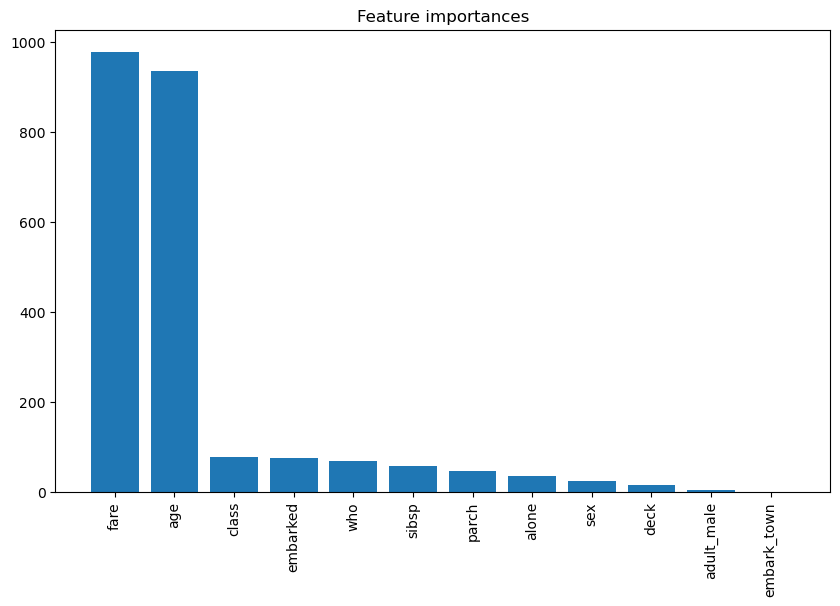

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer, SimpleImputer
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
df = pd.read_csv(url)

# Extract features and target
X = df.drop(columns=['survived', 'alive', 'pclass'])
y = df['survived']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# Impute numerical columns using KNN imputation
imputer_num = KNNImputer(n_neighbors=5)
X[numerical_cols] = imputer_num.fit_transform(X[numerical_cols])

# Impute categorical columns using SimpleImputer with the most frequent strategy
imputer_cat = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = imputer_cat.fit_transform(X[categorical_cols])

# Convert categorical columns to category type
for col in categorical_cols:
    X[col] = X[col].astype('category')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train the model
model = lgb.LGBMClassifier(random_state=42)
model.fit(X_train, y_train, categorical_feature=categorical_cols)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived'])
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)

# Feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

print("Feature importances:")
for f in range(len(features)):
    print(f"{features[indices[f]]}: {importances[indices[f]]:.4f}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=90)
plt.xlim([-1, len(features)])
plt.show()


Accuracy: 0.8172
Classification Report:
              precision    recall  f1-score   support

Not Survived       0.82      0.90      0.86       165
    Survived       0.81      0.69      0.74       103

    accuracy                           0.82       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.82      0.82      0.81       268

Feature importances:
fare: 0.1817
age: 0.1784
adult_male: 0.1522
sex: 0.1171
who: 0.0884
pclass: 0.0548
class: 0.0498
deck: 0.0459
sibsp: 0.0420
parch: 0.0354
embarked: 0.0197
embark_town: 0.0179
alone: 0.0168


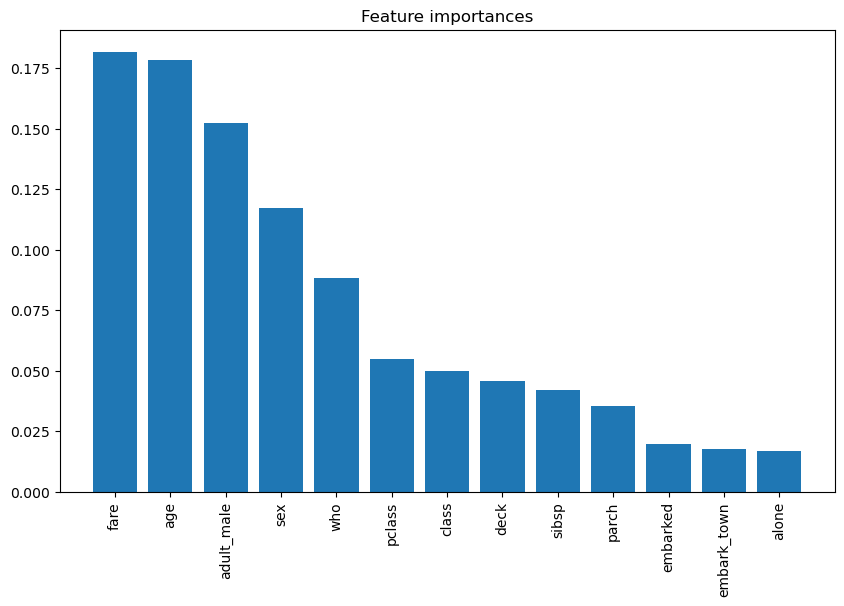

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
df = pd.read_csv(url)

# Extract features and target
X = df.drop(columns=['survived', 'alive'])
y = df['survived']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=[np.number]).columns

# Impute missing data using KNN Imputer for numerical columns
imputer_num = KNNImputer(n_neighbors=5)
X[numerical_cols] = imputer_num.fit_transform(X[numerical_cols])

# Impute missing data using Simple Imputer for categorical columns
imputer_cat = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = imputer_cat.fit_transform(X[categorical_cols])

# Ordinal encode categorical columns
encoder = OrdinalEncoder()
X[categorical_cols] = encoder.fit_transform(X[categorical_cols])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the numerical features
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Initialize and train the model
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived'])
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)


# Feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

print("Feature importances:")
for f in range(len(features)):
    print(f"{features[indices[f]]}: {importances[indices[f]]:.4f}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=90)
plt.xlim([-1, len(features)])
plt.show()
